In [1]:
import os
import numpy as np
import random
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam

home_dir = os.getcwd()
data_fname = os.path.join(home_dir, 'sherwin.txt')

Using TensorFlow backend.


In [2]:
def process_line(line):
    l = line.strip().split('\t')
    return (int(l[0]),
            l[1],
            int(l[2]),
            int(l[3]),
            int(l[4]))

lines = [process_line(line) for line in open(data_fname)]

In [3]:
lines[0]

(1, 'Mulberry Silk', 149, 120, 108)

In [4]:
all_words = set(word for line in lines for word in line[1].split(' '))
all_words_list = sorted(list(all_words))
len(all_words)

1665

In [5]:
mean_r = np.mean([l[2] for l in lines])
print(mean_r)
std_r = np.std([l[2] for l in lines])
print(std_r)

mean_g = np.mean([l[3] for l in lines])
print(mean_g)
std_g = np.std([l[3] for l in lines])
print(std_g)

mean_b = np.mean([l[4] for l in lines])
print(mean_b)
std_b = np.std([l[4] for l in lines])
print(std_b)

172.907431551
59.8986478577
160.17535854
55.4759883723
143.498044329
58.9109192831


In [6]:
def int_color_to_float_color(r, g, b):
    r -= mean_r
    r /= float(std_r)
    g -= mean_g
    g /= float(std_g)
    b -= mean_b
    b /= float(std_b)
    return r, g, b


def float_color_to_int_color(r, g, b):
    r *= std_r
    r += mean_r
    g *= std_g
    g += mean_g
    b *= std_b
    b += mean_b
    return int(r), int(g), int(b) 

In [7]:
color_word_examples = []
for l in lines:
    color_triple = list(int_color_to_float_color(l[2], l[3], l[4]))
    words = l[1].split(' ')
    for word in words:
        color_word_examples.append((color_triple, word))
len(color_word_examples)

2649

In [8]:
word_to_index = {word: i  for i, word in enumerate(all_words_list)}
color_word_index_examples = [(x[0], word_to_index[x[1]]) for x in color_word_examples]

# This is just a demo, so we don't worry about train/valid/test split.
X = [x[0] for x in color_word_index_examples]
X = np.array(X)

y = [x[1] for x in color_word_index_examples]
y = np_utils.to_categorical(y)

In [9]:
model = Sequential()
model.add(Dense(output_dim=100, init="uniform", input_shape=X[0].shape))
model.add(Activation('sigmoid'))
model.add(Dense(output_dim=len(y[0]), init="uniform"))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=["accuracy"])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 100)           400         dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 100)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1665)          168165      activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 1665)          0           dense_2[0][0]                    
Total params: 168,565
Trainable params: 168,565
Non-trainable params: 0
___________________

In [10]:
model.fit(X, y, nb_epoch=50, batch_size=32, verbose=0)
model.fit(X, y, nb_epoch=1, batch_size=32)

Epoch 1/1
2649/2649 [==============================] - 0s - loss: 5.3211 - acc: 0.1370     


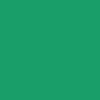

In [11]:
from random import randint
r = randint(0,256)
g = randint(0,256)
b = randint(0,256)
r_float, g_float, b_float = int_color_to_float_color(r, g, b)
color = np.array([r_float, g_float, b_float])
import numpy as np
from scipy.misc import imread,imsave

image_fname = os.path.join(home_dir, 'out.jpg')
img = np.zeros([100,100,3],dtype=np.uint8)
img[::].fill(r)
for i in range(100):
    for j in range(100):
        img[i][j][0] = r
        img[i][j][1] = g
        img[i][j][2] = b

imsave(image_fname,img)

from IPython.display import Image
Image(image_fname)

In [12]:
proba = model.predict_proba(np.array([color]), batch_size=32)[0]
indices = proba.argsort()[-5:][::-1]
keywords = [all_words_list[x] for x in indices]
random.shuffle(keywords)
print(' '.join(keywords[:2]))

1/1 [==============================] - 0s
Green Blue
